In [ ]:
# In this project I tried to predict whether a person living in Saudi Arabia is a Citizen or not based on the features given 
# 35% of Saudi Arabia population are non-citizen 
# I used the basic algorithm for each model since the data is small
# This project is for learning purpose!!!

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
from google.colab import files
import io
import warnings
warnings.simplefilter("ignore")



In [2]:
uploaded = files.upload()

Saving feat_engineering_salary_by_edu.csv to feat_engineering_salary_by_edu.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['feat_engineering_salary_by_edu.csv']))

In [4]:
df.head()

,Unnamed: 0,Degree Level,Nationality,Gender,Salary
0,0,Primary,NonSaudi,Female,1590
1,1,Primary,NonSaudi,Male,2173
2,2,Primary,Saudi,Female,4172
3,3,Primary,Saudi,Male,6172
4,4,Primary,NonSaudi,Female,1597


In [5]:
#drop Unnamed: 0 
df.drop(['Unnamed: 0'], axis =1, inplace=True)
df

,Degree Level,Nationality,Gender,Salary
0,Primary,NonSaudi,Female,1590
1,Primary,NonSaudi,Male,2173
2,Primary,Saudi,Female,4172
3,Primary,Saudi,Male,6172
4,Primary,NonSaudi,Female,1597
...,...,...,...,...
499,Doctorate,Saudi,Male,35622
500,Doctorate,NonSaudi,Female,16727
501,Doctorate,NonSaudi,Male,23036
502,Doctorate,Saudi,Female,24632


In [6]:
# Dummy variables
df_D = pd.get_dummies(df, columns=['Degree Level', 'Gender'], drop_first=True)

In [7]:
df_D.head()

,Nationality,Salary,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Gender_Male
0,NonSaudi,1590,0,0,0,0,1,0,0
1,NonSaudi,2173,0,0,0,0,1,0,1
2,Saudi,4172,0,0,0,0,1,0,0
3,Saudi,6172,0,0,0,0,1,0,1
4,NonSaudi,1597,0,0,0,0,1,0,0


In [8]:
X = df_D.drop('Nationality',axis =1)
y = pd.get_dummies(df_D, columns=['Nationality'], drop_first=True)

In [9]:
y

,Salary,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Gender_Male,Nationality_Saudi
0,1590,0,0,0,0,1,0,0,0
1,2173,0,0,0,0,1,0,1,0
2,4172,0,0,0,0,1,0,0,1
3,6172,0,0,0,0,1,0,1,1
4,1597,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
499,35622,0,1,0,0,0,0,1,1
500,16727,0,1,0,0,0,0,0,0
501,23036,0,1,0,0,0,0,1,0
502,24632,0,1,0,0,0,0,0,1


In [10]:
y = y['Nationality_Saudi']

In [11]:
y

0      0
1      0
2      1
3      1
4      0
      ..
499    1
500    0
501    0
502    1
503    1
Name: Nationality_Saudi, Length: 504, dtype: uint8

In [12]:
df_D

,Nationality,Salary,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Gender_Male
0,NonSaudi,1590,0,0,0,0,1,0,0
1,NonSaudi,2173,0,0,0,0,1,0,1
2,Saudi,4172,0,0,0,0,1,0,0
3,Saudi,6172,0,0,0,0,1,0,1
4,NonSaudi,1597,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
499,Saudi,35622,0,1,0,0,0,0,1
500,NonSaudi,16727,0,1,0,0,0,0,0
501,NonSaudi,23036,0,1,0,0,0,0,1
502,Saudi,24632,0,1,0,0,0,0,0


In [13]:
y

0      0
1      0
2      1
3      1
4      0
      ..
499    1
500    0
501    0
502    1
503    1
Name: Nationality_Saudi, Length: 504, dtype: uint8

In [14]:
y.unique()

array([0, 1], dtype=uint8)

In [15]:
#splitting the data
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [17]:
#create a funtion to excute training the data and predicting with accuracy scocre  

In [18]:
def run_model(model, scaled_X_train, y_train, scaled_X_test, y_test):

  model.fit(scaled_X_train, y_train)

  pred = model.predict(scaled_X_test)

  Accuracy_score= (accuracy_score(y_test, pred));
  print(f'accuracy_score: {Accuracy_score}')
  
  Classification_report=(classification_report(y_test, pred))
  print(f'cl_R:{Classification_report}')
  
  Plot_confusion_matrix = plot_confusion_matrix(model, scaled_X_test, y_test)
  print(f'confusion_matrix: {Plot_confusion_matrix}');


##LogisticRegression

In [19]:
#import LogisticRegression
#import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [20]:
#scaling X_train and X_test
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [22]:
log_model = LogisticRegression()

In [23]:
#train the data
log_model.fit(scaled_X_train, y_train)


LogisticRegression()

In [24]:
#import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, plot_confusion_matrix 


In [25]:
# running the funcion

accuracy_score: 0.9215686274509803
cl_R:              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.93      0.93      0.93        29

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51

confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8597e5cb50>


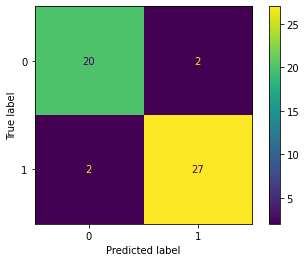

In [26]:
run_model(log_model, scaled_X_train, y_train, scaled_X_test, y_test)

##KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
scaler = StandardScaler()

In [29]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

accuracy_score: 0.9411764705882353
cl_R:              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.91      1.00      0.95        29

    accuracy                           0.94        51
   macro avg       0.95      0.93      0.94        51
weighted avg       0.95      0.94      0.94        51

confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f85975ad610>


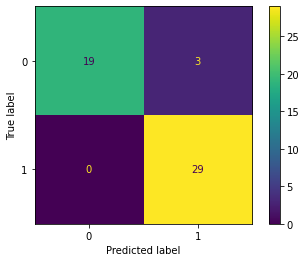

In [36]:
run_model(knn, scaled_X_train, y_train, scaled_X_test, y_test)

##Support Vector Classification

In [37]:
from sklearn.svm import SVC


In [38]:
svc = SVC()

In [39]:
scaler = StandardScaler()

In [40]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [41]:
svc.fit(scaled_X_train, y_train)

SVC()

accuracy_score: 0.9215686274509803
cl_R:              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.93      0.93      0.93        29

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51

confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f859760e810>


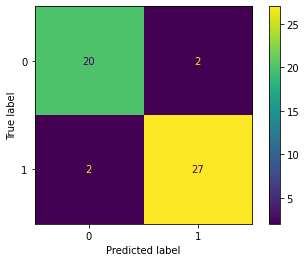

In [42]:
run_model(svc, scaled_X_train, y_train, scaled_X_test, y_test)

##Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
scaler = StandardScaler()

In [45]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [46]:
dtc = DecisionTreeClassifier()

accuracy_score: 0.8823529411764706
cl_R:              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.87      0.93      0.90        29

    accuracy                           0.88        51
   macro avg       0.89      0.87      0.88        51
weighted avg       0.88      0.88      0.88        51

confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f859747fa10>


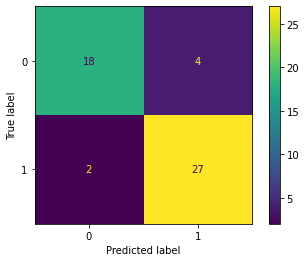

In [47]:
run_model(dtc, scaled_X_train, y_train, scaled_X_test, y_test)

In [48]:
#importing_features
dtc.feature_importances_

array([0.66209551, 0.04343441, 0.06029166, 0.05998743, 0.04202671,
       0.04953801, 0.04154413, 0.04108215])

In [49]:
imp_feat = pd.DataFrame(index=X.columns,data=dtc.feature_importances_,columns=['Feature_Importance'])

In [50]:
imp_feat.sort_values('Feature_Importance', ascending=False)

,Feature_Importance
Salary,0.662096
Degree Level_Doctorate,0.060292
Degree Level_Intermediate,0.059987
Degree Level_Primary,0.049538
Degree Level_Diploma,0.043434
Degree Level_Master Degree,0.042027
Degree Level_Secondary,0.041544
Gender_Male,0.041082


##RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
scaler = StandardScaler()

In [53]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [55]:
rfc = RandomForestClassifier()

accuracy_score: 0.9019607843137255
cl_R:              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.90      0.93      0.92        29

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51

confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8596cad210>


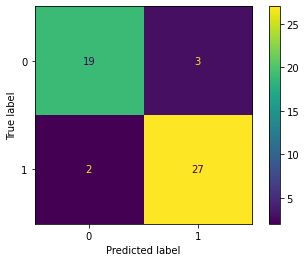

In [56]:
run_model(rfc, scaled_X_train, y_train, scaled_X_test, y_test)

In [57]:
rfc.feature_importances_

array([0.83332632, 0.0140083 , 0.02223041, 0.03123241, 0.02312843,
       0.03096759, 0.02649974, 0.01860679])

In [58]:
imp_feat_R = pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature_Importance'])

In [59]:
imp_feat_R.sort_values('Feature_Importance', ascending=False)

,Feature_Importance
Salary,0.833326
Degree Level_Intermediate,0.031232
Degree Level_Primary,0.030968
Degree Level_Secondary,0.026500
Degree Level_Master Degree,0.023128
Degree Level_Doctorate,0.022230
Gender_Male,0.018607
Degree Level_Diploma,0.014008


##AdaBoostClassifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
scaler = StandardScaler()

In [62]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [63]:
AdaB = AdaBoostClassifier()

accuracy_score: 0.9019607843137255
cl_R:              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.88      0.97      0.92        29

    accuracy                           0.90        51
   macro avg       0.91      0.89      0.90        51
weighted avg       0.91      0.90      0.90        51

confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8596946a50>


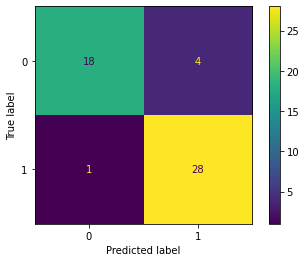

In [64]:
run_model(AdaB, scaled_X_train, y_train, scaled_X_test, y_test)

In [65]:
AdaB.feature_importances_

array([0.46, 0.02, 0.22, 0.02, 0.14, 0.04, 0.02, 0.08])

In [66]:
imp_feat_AdaB = pd.DataFrame(index=X.columns,data=AdaB.feature_importances_,columns=['Feature_Importance'])

In [67]:
imp_feat_AdaB.sort_values('Feature_Importance', ascending=False)

,Feature_Importance
Salary,0.46
Degree Level_Doctorate,0.22
Degree Level_Master Degree,0.14
Gender_Male,0.08
Degree Level_Primary,0.04
Degree Level_Diploma,0.02
Degree Level_Intermediate,0.02
Degree Level_Secondary,0.02


##GradientBoostingClassifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
scaler = StandardScaler()

In [70]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [71]:
Gd = GradientBoostingClassifier()

accuracy_score: 0.8823529411764706
cl_R:              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.85      0.97      0.90        29

    accuracy                           0.88        51
   macro avg       0.90      0.87      0.88        51
weighted avg       0.89      0.88      0.88        51

confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f859681be50>


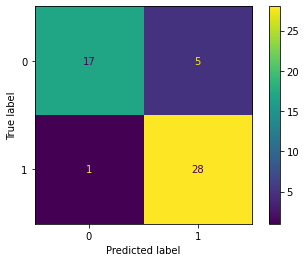

In [72]:
run_model(Gd, scaled_X_train, y_train, scaled_X_test, y_test)

In [73]:
Gd.feature_importances_

array([0.63008925, 0.04151327, 0.10684134, 0.05957148, 0.03771881,
       0.05680355, 0.04361364, 0.02384866])

In [74]:
imp_feat_Gd = pd.DataFrame(index=X.columns,data=Gd.feature_importances_,columns=['Feature_Importance'])

In [75]:
imp_feat_Gd.sort_values('Feature_Importance', ascending=False)

,Feature_Importance
Salary,0.630089
Degree Level_Doctorate,0.106841
Degree Level_Intermediate,0.059571
Degree Level_Primary,0.056804
Degree Level_Secondary,0.043614
Degree Level_Diploma,0.041513
Degree Level_Master Degree,0.037719
Gender_Male,0.023849


In [76]:
# Based from Machine Learming Algorithms resuilts it looks  KNeighborsClassifier perfomes better 
# with 0.94 accuracy KNeighborsClassifier